# Lab 6 - Potential Outcomes and Causal Inference

In [2]:
import numpy as np
from datascience import Table
%matplotlib inline

## Part 1. Reading real causal claims

**Question 1.1 Read <a href="https://www.bbc.com/news/world-asia-58710194">this article</a> from the BBC this week. Identify two causal claims. For each, answer the following:
(1) Is it a causal claim about a specific case or a general causal claim?
(2) If there is evidence of the causal claim, do you find it convincing? If not, what data could we collect to test it?**

*Answer to 1.1*

 Consider this quote from Senator Lindsey Graham: "Russia's actions had no impact at all on the outcome of the (2016) election." Let's think about translating this into potential outcomes language. To simplify, we will interpret the "outcome" of the election as the number of electoral college votes won by Trump (e.g., you could also think about it as who won the election, or the number of popular votes. We will think of the "treatment" here as a binary variable  where $D_{2016}=1$ means "interference by Russia" and $D_{2016}=0$ means "no interference by Russia." We will take it as given that in reality $D_{2016}=1$
 
 **Question 1.2. Trump won 304 electoral college votes in 2016. How can we express this in potential outcomes notation? (Hint: it should be of the form that Y with some subscript(s) is equal to something.)**

*Answer to 1.2*

**Question 1.3. How can we express Graham's claim in potential outcomes notation (again it should be in the form of Y with some subscript(s) being equal to something)**

*Answer to 1.3*

**Question 1.4. The closest state in the election was my home state of Michigan, which has 16 electoral votes. Suppose someone thinks that Russian interference had a large enough impact to cause Trump to win Michigan, but not any other state. Express this claim in potential outcomes notation.)**

*Answer to 1.4*

## Part 2. Lobbying and Corruption in All Seeing Mode

A common concern in many democratic (and less-than democratic) countries is that those with resources can use lobbying, campaign contributions, or outright bribes to get politicians to do their bidding. Often, the evidence used to make this argument is that those who receive lots of money from a particular interest group tend to vote in a way that interest group wants (a friend of mine has expressed this in <a href="https://www.hrothstein.com/#/the-cost-of-denial/">art form</a>).

Let's about what causal theories are consistent with this evidence. We will simulate a legislature with 500 members. We assume they all have an ideology which ranges from 0 to 1, where we will interpret this as their predisposition to vote in a "pro-business" fashion.


In [3]:
n_leg = 500
leg_ideol = np.random.rand(n_leg)
leg_data = Table().with_column("Ideology", leg_ideol)
leg_data

Ideology
0.834
0.365451
0.405385
0.607098
0.763144
0.619431
0.603153
0.0881998
0.878919
0.938498


We may be interested in how legislators vote on particular bills, or their overall voting behavior. Since it will make some calculations a bit more natural, we will do the latter.

An outcome we might care about is what proportion of "pro-business" bills the legilsator votes for, which will range from 0 to 1. If our ideology has any meaning, then those with a higher ideology should be more likely to vote for these bills. There are probably other factors that matter as well. To capture these ideas, we are going to assume that the proportion of pro-business bills they  vote for can be written:
$$
\text{pro} = b_{leg} \times \text{ideology} + (1-b_{leg}) \times e
$$
where $e$ is an *error term* which is a uniform random number between 0 and 1. Here is code for this *data generating process*:

In [4]:
b_leg = 1/2
pro = b_leg * leg_ideol + (1-b_leg)*np.random.rand(n_leg)
leg_data = leg_data.with_column("Pro B Votes", pro)
leg_data

Ideology,Pro B Votes
0.834,0.829311
0.365451,0.670029
0.405385,0.503502
0.607098,0.546035
0.763144,0.674808
0.619431,0.748725
0.603153,0.503895
0.0881998,0.418582
0.878919,0.758311
0.938498,0.547603


A quick side note: we often define our error term to have an average of 0. We could have also written this as:
$$
\text{pro} = b_{leg} \times \text{ideology} + \frac {1-b_{leg}}{2} + e
$$
Where $e$ is uniformly distributed between $-\frac {1-b_{leg}}{2}$ and $\frac {1-b_{leg}}{2}$. Think through why this would produce an equivalent result.

Note we haven't said anything about the donor behavior yet; so we have implicitly assumed that this doesn't affect the vote! One theory about donor behavior is that they will give money to those with an aligned ideology in order to help them get re-elected. 

We can model this with a simple utility framework. Suppose the "cost" to donating is $c$, and the benefit is equal to:
$$
\text{benefit} = b_{don} \times \text{ideology} + (1-b_{don}) \times e
$$
where $e$ is a uniform random number between 0 and 1. So, when $b$ is high, the donor puts more weight on ideology, and when $b$  is low they put more weight on other factors.

**Question 2.1. Write code to set $b=1/2$, $c=1/2$, compute the expected utility to donate, and make a variable called `Donate` which is equal to 1 when this is greater than or equal to the cost. (Hint: if you take a variable that is a boolean (True of False) and multiply it by 1, Python will turn this into an integer equal to 1 for True and 0 for False)**

In [5]:
b_don=1/2
c=1/2
u_don = b_don*leg_ideol + (1-b_don)*np.random.rand(n_leg)
leg_data=leg_data.with_column("Donate", 1*(u_don > c))
leg_data

Ideology,Pro B Votes,Donate
0.834,0.829311,0
0.365451,0.670029,1
0.405385,0.503502,1
0.607098,0.546035,1
0.763144,0.674808,1
0.619431,0.748725,0
0.603153,0.503895,0
0.0881998,0.418582,0
0.878919,0.758311,1
0.938498,0.547603,1


**Question 2.2. What is the average of the `Pro B Votes` variable among those who receive a donation? Among those who don't? What is the difference of means?**

In [6]:
don_avg = np.mean(leg_data.where("Donate", 1).column("Pro B Votes"))

In [7]:
nodon_avg = np.mean(leg_data.where("Donate", 0).column("Pro B Votes"))

In [8]:
print(don_avg, nodon_avg, don_avg - nodon_avg)

0.5927679767863426 0.4195350623945325 0.17323291439181016


**Question 2.3. You should get that there is a positive difference of means. But we set this up in a way that there is no real causal effect: the legislator behavior was unaffected of what the donor did. If someone were to say to you "this just goes to show that politicians do whatever lobbyists want them to do!" what would be a good response based on what we learned this week?**

*Answer to 2.3*

**Question 2.4. One thing we might want to study is how the parameters of this data generating process affect the observed difference of means (which we know here is all selection bias). Write a function called `getdom(b_leg,b_don,c)` which replicates the analysis above, but with these variables as arguments. (That is, create a Table with the legislator ideology as a variable, then add variables for the legislator voting behavior and the donor choice, then compute the difference of means in voting behavior among those who received donations vs those who did not). Check that `getdom(.5, .5, .5)` gives a similar answer to what you got for 2.2 (it won't be exactly the same due to randomness).**

In [10]:
def getdom(b_leg, b_don, c):
    leg_ideol = np.random.rand(n_leg)
    leg_data = Table().with_column("Ideology", leg_ideol)
    pro = b_leg * leg_ideol + (1-b_leg)*np.random.rand(n_leg)
    leg_data = leg_data.with_column("Pro B Votes", pro)
    u_don = b_don*leg_ideol + (1-b_don)*np.random.rand(n_leg)
    leg_data=leg_data.with_column("Donate", 1*(u_don > c))
    don_avg = np.mean(leg_data.where("Donate", 1).column("Pro B Votes"))
    nodon_avg = np.mean(leg_data.where("Donate", 0).column("Pro B Votes"))
    return [don_avg, nodon_avg, don_avg - nodon_avg]

**Question 2.5. See what happens if you increase or decrease each of the three parameters. Make sure to keep them all between 0 and 1 (if you put c outside of this range you might get an error message; think about why!). Does this lead to more or less selection bias, and why?**

In [11]:
getdom(.5, .8, .2)

[0.5239548272726228, 0.2827351403501983, 0.24121968692242446]

Now let's do a variant of the analysis above, but where there is a real causal effect of donations. To do that, we will first create a table called `leg_data2` with the legislator ideology and the donation choice, which we treat the same as above.

In [12]:
b_leg=.5
b_don=.5
c=.5

leg_data2 = Table().with_column("Ideology", leg_ideol)
u_don = b_don*leg_ideol + (1-b_don)*np.random.rand(n_leg)
leg_data2=leg_data2.with_column("Donate", 1*(u_don > c))

Let's suppose that if a legislator does not receive a donation, they vote as we assumed above. If they do receive a donation, they will vote in a more pro-business fashion by $0.2$. We will create two separate variabels for the potential voting behavior without a donation (`Pro B Votes 0`) and with a donation (`Pro B Votes 1`).

In [13]:
b_bribe = .2
pro0 = b_leg * leg_ideol + (1-b_leg)*np.random.rand(n_leg)
pro1 = pro0 + b_bribe
leg_data2 = leg_data2.with_column("Pro B Votes 0", pro0)
leg_data2 = leg_data2.with_column("Pro B Votes 1", pro1)


**Question 2.6. Create a variable which correspond to the realized voting behavior and add it to the `leg_data2` table with the name "Pro B Votes".**

In [14]:
pro = pro0*(1-leg_data2.column("Donate")) + pro1*leg_data2.column("Donate")
leg_data2 = leg_data2.with_column("Pro B Votes", pro)
leg_data2

Ideology,Donate,Pro B Votes 0,Pro B Votes 1,Pro B Votes
0.834,1,0.685666,0.885666,0.885666
0.365451,0,0.239178,0.439178,0.239178
0.405385,1,0.276235,0.476235,0.476235
0.607098,1,0.768493,0.968493,0.968493
0.763144,1,0.398211,0.598211,0.598211
0.619431,1,0.548237,0.748237,0.748237
0.603153,0,0.730969,0.930969,0.730969
0.0881998,0,0.197314,0.397314,0.197314
0.878919,1,0.442255,0.642255,0.642255
0.938498,1,0.904467,1.10447,1.10447


**Question 2.7. Compute the difference of means in realized voting behavior among those who received a donation versus not.**

In [22]:
dom = np.mean(leg_data2.where("Donate",1).column("Pro B Votes")) - np.mean(leg_data2.where("Donate",0).column("Pro B Votes"))
dom

0.3535998602706474

**Question 2.8. Compute the selection bias in this estimate by comparing the difference in the average of "Pro B Votes 0" among those who received a donation versus not.**

In [23]:
sb=np.mean(leg_data2.where("Donate",1).column("Pro B Votes 0")) - np.mean(leg_data2.where("Donate",0).column("Pro B Votes 0"))
sb

0.15359986027064731

**2.9. Verify that the Difference of Means = Causal Effect + Selection Bias formula is correct in this case**

In [25]:
print(dom,sb + b_bribe)

0.3535998602706474 0.3535998602706473


Suppose as researcers also have the data on the legislator ideology, which is measured in a way that is independent of their voting beahvior/who donates to them (which are incidentally the two main sources of data we use to estimate ideology!) 

Even without knowing how the data was generated, we can get a sense of whether this might be driving selection bias by looking at the relationship between ideology and donations and the relationship between ideology and voting.

**Question 2.10. Create a scatter plot with "Ideology" on the x axis and "Pro B Votes" on the y axis, using `leg_data`**

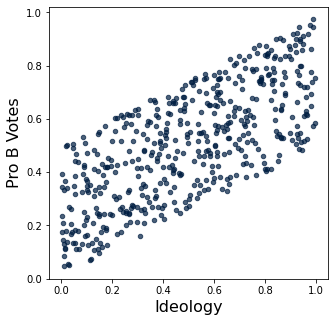

In [26]:
leg_data.scatter("Ideology", "Pro B Votes")

**Question 2.11. Now compare the difference in the mean of the "Ideology" variable among those who received donations vs not.**

In [28]:
np.mean(leg_data.where("Donate", 1).column("Ideology"))- np.mean(leg_data.where("Donate", 0).column("Ideology"))

0.3162202859154078

**Question 2.12. We can see all three of these variables together by making a scatterplot of with the "Ideology" variable on the x axis and the "Pro B Votes" variable on the y axis, using `group=Donate` to plot those receiving donations in a different color. Do this for `leg_data`.**

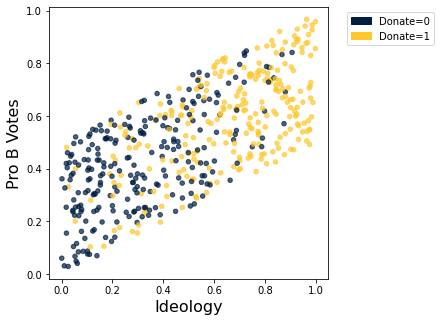

In [13]:
leg_data.scatter("Ideology", "Pro B Votes", group="Donate")

**Question 2.13. Use what you found in the last three questions to argue that comparing the voting behavior of those who received donations vs not isn't a *ceteris paribus* comparison.**

*Answer to 2.13*

**Question 2.14. Now make the same graph as in 2.13 but for leg_data2. Compare these two graphs.**

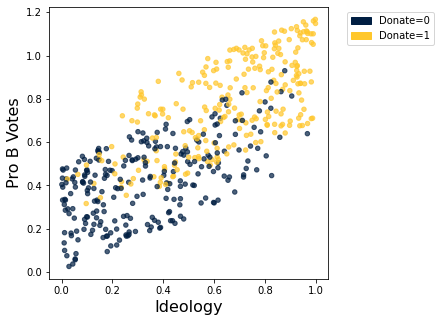

In [29]:
leg_data2.scatter("Ideology", "Pro B Votes", group="Donate")